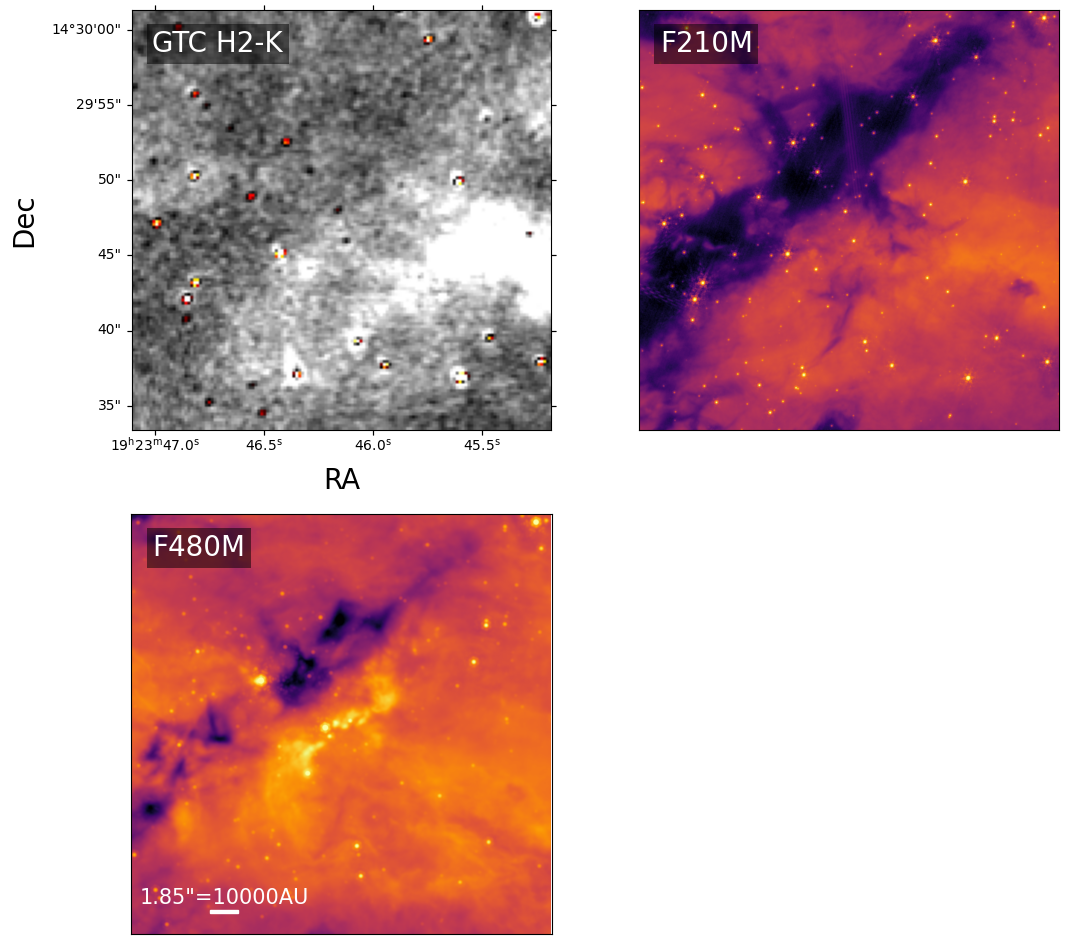

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.nddata import Cutout2D
from astropy.visualization import simple_norm
import matplotlib.colors as mcolors
from matplotlib import gridspec
from astropy.io import fits
from astropy.wcs import WCS
from regions import Regions
import astropy.units as u
from astropy.coordinates import SkyCoord
from regions import PixCoord
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

def add_scalebar(ax, xpos, ypos, length, pixel_scale, label=None, color='white', fontsize=20, bbox=False, pad=0.05, thickness=0.05, distance=5.4*u.kpc):
    # length: an astropy Quantity like 1*u.arcsec
    # pixel_scale: angular size per pixel as a Quantity (e.g., 0.031*u.arcsec)
    # compute length in pixels
    try:
        pix_len = (length / pixel_scale).decompose().value
    except Exception:
        # fallback if pixel_scale is a plain number
        pix_len = (length / pixel_scale)
    # draw a white rectangle as scalebar
    rect = Rectangle((xpos - pix_len/2.0, ypos), pix_len, pix_len * thickness, color=color)
    ax.add_patch(rect)
    if label:
        if bbox:
            ax.text(xpos, ypos + pad, label, color=color, fontsize=fontsize, ha='center', bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))
        else:
            ax.text(xpos, ypos + pad, label, color=color, fontsize=fontsize, ha='center')
image_filenames ={
    "f140m": "/orange/adamginsburg/jwst/w51/F140M/pipeline/jw06151-o001_t001_nircam_clear-f140m-merged_i2d.fits",
    "f162m": "/orange/adamginsburg/jwst/w51/F162M/pipeline/jw06151-o001_t001_nircam_clear-f162m-merged_i2d.fits",
    "f182m": "/orange/adamginsburg/jwst/w51/F182M/pipeline/jw06151-o001_t001_nircam_clear-f182m-merged_i2d.fits",
    "f187n": "/orange/adamginsburg/jwst/w51/F187N/pipeline/jw06151-o001_t001_nircam_clear-f187n-merged_i2d.fits",
    "f210m": "/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151-o001_t001_nircam_clear-f210m-merged_i2d.fits",
    "f335m": "/orange/adamginsburg/jwst/w51/F335M/pipeline/jw06151-o001_t001_nircam_clear-f335m-merged_i2d.fits",
    "f360m": "/orange/adamginsburg/jwst/w51/F360M/pipeline/jw06151-o001_t001_nircam_clear-f360m-merged_i2d.fits",
    "f405n": "/orange/adamginsburg/jwst/w51/F405N/pipeline/jw06151-o001_t001_nircam_clear-f405n-merged_i2d.fits",
    "f410m": "/orange/adamginsburg/jw51/F410M/pipeline/jw06151-o001_t001_nircam_clear-f410m-merged_i2d.fits",
    "f480m": "/orange/adamginsburg/jwst/w51/F480M/pipeline/jw06151-o001_t001_nircam_clear-f480m-merged_i2d.fits",
    "f560w": "/orange/adamginsburg/jwst/w51/F560W/jw06151-o002_t001_miri_f560w_i2d.fits",
    "f770w": "/orange/adamginsburg/jwst/w51/F770W/jw06151-o002_t001_miri_f770w_i2d.fits",
    "f1000w": "/orange/adamginsburg/jwst/w51/F1000W/jw06151-o002_t001_miri_f1000w_i2d.fits",
    "f1280w": "/orange/adamginsburg/jwst/w51/F1280W/jw06151-o002_t001_miri_f1280w_i2d.fits",
    "f1500w": "/orange/adamginsburg/jwst/w51/F1500W/jw06151-o002_t001_miri_f1500w_i2d.fits",
    "f2100w": "/orange/adamginsburg/jwst/w51/F2100W/jw06151-o002_t001_miri_f2100w_i2d.fits",
}

regions_hodapp = Regions.read('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/another_hodapp.reg', format='ds9')    
region_hodapp = regions_hodapp[0]
f140m_img_filename = image_filenames['f140m']
f140m_wcs = WCS(fits.open(f140m_img_filename)[0].header, naxis=2)
reproj_dir2 = '/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/data_reprojected/'

f210m_img_filename = '/orange/adamginsburg/jwst/w51/f210m_reprojected_to_f140m_scale.fits'
f210m_img = fits.open(f210m_img_filename)
f210m_wcs = WCS(f210m_img[0].header, naxis=2)

f560w_img_filename = '/orange/adamginsburg/jwst/w51/f560w_reprojected_to_f140m_scale.fits'
f560w_img = fits.open(f560w_img_filename)
f560w_wcs = WCS(f560w_img[0].header, naxis=2)

f480m_img_filename = '/orange/adamginsburg/jwst/w51/f480m_reprojected_to_f140m_scale.fits'
f480m_img = fits.open(f480m_img_filename)
f480m_wcs = WCS(f480m_img[0].header, naxis=2)

gtc_h2k = fits.open("/orange/adamginsburg/jwst/w51/gtc_H2minusK_reprojected_to_f140m_field.fits")
gtc_h2k_wcs = WCS(gtc_h2k[0].header, naxis=2)
gtc_img = gtc_h2k[0].data

colors1 = plt.cm.gray_r(np.linspace(0., 1, 128))
colors2 = plt.cm.hot(np.linspace(0, 1, 128))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

gtc_cutout = Cutout2D(gtc_img, region_hodapp.center, (region_hodapp.width, region_hodapp.height), wcs=gtc_h2k_wcs)
f210m_cutout = Cutout2D(f210m_img[0].data, region_hodapp.center, (region_hodapp.width, region_hodapp.height), wcs=f210m_wcs)
f560w_cutout = Cutout2D(f560w_img[0].data, region_hodapp.center, (region_hodapp.width, region_hodapp.height), wcs=f560w_wcs)
f480m_cutout = Cutout2D(f480m_img[0].data, region_hodapp.center, (region_hodapp.width, region_hodapp.height), wcs=f480m_wcs)

fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)
ax1 = fig.add_subplot(gs[0,0], projection=gtc_cutout.wcs)
ax1.imshow(gtc_cutout.data, origin='lower', cmap=mymap, vmin=-20, vmax=40)
ax1.text(0.05, 0.9, 'GTC H2-K', color='white', fontsize=20, transform=ax1.transAxes, bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))


ax2 = fig.add_subplot(gs[0,1], projection=f210m_cutout.wcs)
ax2.imshow(f210m_cutout.data, origin='lower', cmap='inferno', norm=simple_norm(f210m_cutout.data, 'log', percent=99.9))
#add_scalebar(ax2, f210m_cutout.data.shape[1]*0.1, f210m_cutout.data.shape[0]*0.05, 1*u.arcsec, 0.031*u.arcsec, label='1"', color='white', fontsize=15, bbox=True)
ax2.text(0.05, 0.9, 'F210M', color='white', fontsize=20, transform=ax2.transAxes, bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))
ax3 = fig.add_subplot(gs[1,0], projection=f480m_cutout.wcs)
ax3.imshow(f480m_cutout.data, origin='lower', cmap='inferno', norm=simple_norm(f480m_cutout.data, 'log', percent=99.9))
#add_scalebar(ax3, f480m_cutout.data.shape[1]*0
ax3.text(0.05, 0.9, 'F480M', color='white', fontsize=20, transform=ax3.transAxes, bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))
ax1.set_xlabel('RA', fontsize=20)
ax1.set_ylabel('Dec', fontsize=20)
#turn off labels for middle and right panels - use WCSAxes coord API to be safe
# hide tick labels and ticks for ax2
for coord in ax2.coords:
    coord.set_ticklabel_visible(False)
    coord.set_ticks_visible(False)
    coord.set_axislabel('')
# hide tick labels and ticks for ax3
for coord in ax3.coords:
    coord.set_ticklabel_visible(False)
    coord.set_ticks_visible(False)
    coord.set_axislabel('')
add_scalebar(ax3, f480m_cutout.data.shape[1]*0.22, f480m_cutout.data.shape[0]*0.05, 1.85*u.arcsec, 0.031*u.arcsec, label='1.85"=10000AU', color='white', fontsize=15, pad=18, thickness=0.1)

plt.savefig('plots/another_hodapp.png', dpi=300, bbox_inches='tight')
plt.show()



